## 動的計画法/価値反復法

In [1]:
%load_ext lab_black

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../../"))

from collections import defaultdict
from common.gridworld import GridWorld

#### 方策の改善

In [3]:
def argmax(d):
    """d (dict)"""
    max_value = max(d.values())
    max_key = -1
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key

#### 価値関数をgreedy化する関数

In [4]:
def get_greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            value = 0

            if next_state is not None:
                r = env.reward(state, action, next_state)
                value += r + gamma * V[next_state]
            action_values[action] = value

        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs

    return pi

#### 評価と改善を繰り返す
- env:環境
- gamma:割引率
- threshold:方策評価を行うときの更新をストップするための閾値
- is_render:方策の評価・改善を行う過程を描画するかどうかのフラグ

In [5]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)
        new_pi = get_greedy_policy(V, env, gamma)

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:
            break
        pi = new_pi

    return pi

#### 価値反復法の実装

In [6]:
def value_iter_onestep(env, gamma, V):
    delta = 0

    for state in env.states():
        action_values = []

        for action in env.actions():
            next_state = env.next_state(state, action)

            if next_state is not None:
                r = env.reward(state, action, next_state)
                value = r + gamma * V[next_state]
                action_values.append(value)

        if len(action_values) > 0:
            new_value = max(action_values)
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value

    return V, delta

In [7]:
def value_iter(env, gamma, threshold=0.001, is_render=True):
    V = defaultdict(lambda: 0)

    while True:
        if is_render:
            env.render_v(V)

        V, delta = value_iter_onestep(env, gamma, V)
        if delta < threshold:
            break
    return V

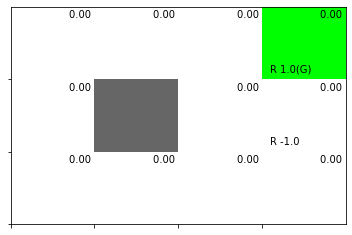

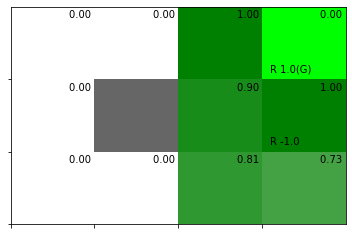

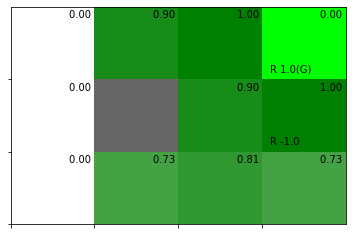

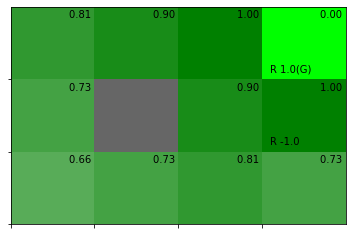

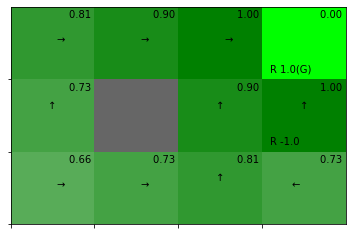

In [8]:
env = GridWorld()
gamma = 0.9
V = value_iter(env, gamma)

pi = get_greedy_policy(V, env, gamma)
env.render_v(V, pi)